In [1]:
import numpy as np 
import cv2
import tensorflow as tf 
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import itertools
import os
import shutil 
import random 
import glob 
import matplotlib.pyplot as plt 
import warnings 

In [2]:
DATADIR = '/Users/aadarshmahra/Desktop/CODE/PYTHON/LPR/data/CNN_letter_Dataset'
CATEGORIES = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
             'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R',
             'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']  # Z's index is 34
IMG_SIZE = 50


In [3]:
training_data = [] # contains tuples -> (img_data, label)

def create_training_data(): 
    for category in CATEGORIES: 
        curr_dir = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(curr_dir): 
            try: 
                img_path = os.path.join(curr_dir,img)  #file path to current img
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e: 
                print('Exception {}'.format(e))

create_training_data()
print(len(training_data))

35500


14
(50, 50)


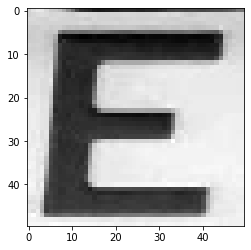

In [4]:
# SEEING IMAGES 
first = training_data[15000][0]
print(training_data[15000][1])
print(first.shape)
# new = cv2.resize(first, (IMG_SIZE, IMG_SIZE))
plt.imshow(first, cmap='gray')
plt.show()

In [5]:
import random 

random.shuffle(training_data)



In [6]:
X = []  # feature set
y = []  # label set
for features, label in training_data: 
    X.append(features)
    y.append(label)
# lists can't be passed to a CNN
X = (np.array(X)).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # make it a np array and resize
y = np.array(y)

In [7]:
# TRAINING THE MODEL : 
X = X/255.0
model = Sequential()
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(35, activation='softmax'))
# model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X, y, epochs=5)
# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print(test_acc)
model.save("model_char_rec.h5")


2021-08-12 00:08:33.774099: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-12 00:08:34.080186: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1110/1110 [==============================] - 75s 67ms/step - loss: 0.7917 - accuracy: 0.7939
Epoch 2/5
1110/1110 [==============================] - 75s 67ms/step - loss: 0.1245 - accuracy: 0.9671
Epoch 3/5
1110/1110 [==============================] - 77s 69ms/step - loss: 0.0512 - accuracy: 0.9863
Epoch 4/5
1110/1110 [==============================] - 85s 77ms/step - loss: 0.0273 - accuracy: 0.9923
Epoch 5/5
1110/1110 [==============================] - 81s 73ms/step - loss: 0.0147 - accuracy: 0.9961
